# ePix image show average

In [1]:
%matplotlib notebook
import os
import numpy as np
import scipy
from scipy import optimize, ndimage

import matplotlib.pyplot as plt
from matplotlib import cm
from extra_data import *
from extra_data import by_id
import pandas as pd
import zipfile
from PIL import Image

## Prepare folder locations with experimental run and proposal number
## Change this cell!

In [2]:
# Create proposal directory
#propno = "3213" #"p002353" 
propno = "2838"
home_dir = "/home/jchal/"
prop_dir = home_dir+"p"+propno

os.chdir(home_dir)

# Make the output directory - caution, this makes the directory here where you run this script.
if not os.path.exists("p"+propno):
    os.mkdir("p"+propno)
    os.chdir(home_dir+"p"+propno)
else:
    os.chdir(home_dir+"p"+propno)

print(os.getcwd())

/home/jchal/p2838


### Open run

Run 136 contains 2033 train_IDs.
Used images: 1000


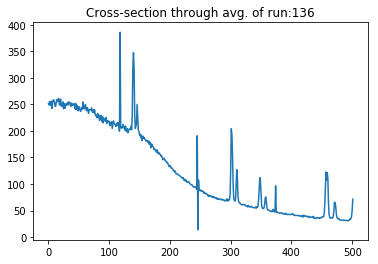

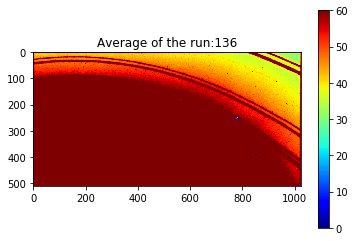

In [6]:
#View average of listed runs
%matplotlib inline

# T = [0.02, 1.0, 0.43, 0.18]
#runs = [45,46,47,48]       #0fs
#runs = [50,51,52,53]       #25fs rather 25as
#runs = [56,58,59,60]       #50fs rather 50as
#runs = [56, 61]            # check pump/probe ratio after operators mistake
#runs = [63,64,65,66]       #75fs
#runs = [69,70,71,72]        #100fs
#runs = [75,76,77,79]        #125fs
#runs = [81,82,85,86]        #150fs
#runs = [88,89,90,91]        #175fs
#runs = [93,94,95,96]        #200fs
#runs = [99,100,101,102]     #225fs
#runs = [104,105,106,107]    #250fs
#runs = [109,110,111,112]    #300fs
#runs = [114,115,116,117]    #350fs
#runs = [119,120,121,122]    #25fs
#runs = [124,125,126,127]    #50fs
#runs = [128,129,130,131]    #75fs

#runs = [134]                 #capton diffuse scattering calibration

# T = [0.02, 1.0, 0.75, 0.57, 0.32, 0.1]     # transmissions  
#runs = [135,136,137,138,139,140]    #0fs
#runs = [142,143,144,145,146,147]    #25fs
#runs = [148,149,150,151,152,153]    #50fs
#runs = range(154,160,1)             #75fs
#runs = range(160,166,1)             #100fs
#runs = range(166,172,1)             #125fs
#runs = range(172,178,1)             #150fs
#runs = range(178,184,1)             #175fs
#runs = range(185,191,1)             #200fs
#runs = range(191,197,1)             #225fs
#runs = range(197,203,1)             #250fs
#runs = range(203,209,1)             #275fs
runs = range(209,214,1)              #300fs


runs = [136]

for i in range(0, len(runs)):
    #print(runs[i])
    run = open_run(propno, runs[i], "proc")
    print("Run " + str(runs[i]) + " contains " + str(len(run.train_ids)) + " train_IDs.")
   
    end = len(run.train_ids)
    #end = 500
    start = 0
    
    average = np.zeros([512,1024])
    count = 0
    
    for j in range(start, end):
        sel = run.select_trains(j)
        ePix = sel['HED_IA1_EPX100-1/DET/RECEIVER:daqOutput', 'data.adc'].xarray().squeeze()
        #print(JF3.data.sum())
        if JF3.data.sum().__gt__(1000000.0):
            average = average + JF3.data
            count = count + 1
        
    average = average/count
    print("Used images: " + str(count))
    
    cross_section = np.zeros([512])
    for k in range(0,512):
        cross_section[k]=average[511-k,2*k]
        
    plt.plot(cross_section[10:])
    plt.title("Cross-section through avg. of run:" + str(runs[i]))
    plt.savefig("Run"+str(runs[i])+" (cross-section).png", format="png")
    plt.show()
    
    plt.figure()
    average = np.where(average<0,0,average)
    plt.imshow(average,  vmin = 0, vmax = 60, cmap="jet")
    #plt.imshow(np.log10(average), cmap="jet")
    cbar = plt.colorbar()
    #plt.clim(JF3.data.min(), JF3.data.max())
    #cbar.ax.set_ylabel("Intensity", rotation=270)
    #plt.ylim(390, 430)
    plt.title("Average of the run:" + str(runs[i]))
    #plt.savefig("Run"+str(runs[i])+".png", format="png")
    plt.show()
    
    # Save tif better
    #tifimage = Image.fromarray(average)
    #tifimage.save("Run"+str(runs[i])+".tif")
    
        


In [317]:
run.instrument_sources
#run.info()

frozenset({'HED_EXP_IBS/CAM/CAM:daqOutput',
           'HED_IA1_EPX100-1/DET/RECEIVER:daqOutput',
           'HED_IA1_EPX100-2/DET/RECEIVER:daqOutput',
           'HED_IA1_JF500K1/DET/JNGFR01:daqOutput',
           'HED_IA1_JF500K2/DET/JNGFR02:daqOutput',
           'HED_IA1_JF500K3/DET/JNGFR03:daqOutput',
           'HED_IA1_TSC-1/CAM/TARGET_FRONT:daqOutput',
           'HED_IA1_TSC-2/CAM/TARGET_BACK:daqOutput',
           'HED_RR_SYS/MDL/KARABACON:output',
           'HED_XTD6_XGM/XGM/DOOCS:output',
           'SA2_XTD1_XGM/XGM/DOOCS:output',
           'SA2_XTD6_HIREX/AVG/BRAGG:daqOutput',
           'SA2_XTD6_HIREX/CAM/BRAGG:daqOutput',
           'SA2_XTD6_HIREX/DAQ/GOTTHARD_MASTER:daqOutput',
           'SA2_XTD6_HIREX/MDL/FEL_SPECTROMETER:output',
           'SA2_XTD6_HIREX/PROC/BRAGG:output'})

In [97]:
# Delete all files in the run directory!!!
run_number = 35
run_dir = prop_dir + "/"+"Run"+str(run_number)
os.chdir(run_dir)
print("Deleting files in: " + os.getcwd())
for file in os.listdir("."):    
    if os.path.isfile(file):
        os.remove(file)
        #print("Delete: " + file)

Deleting files in: /home/jchal/p2838/Run35


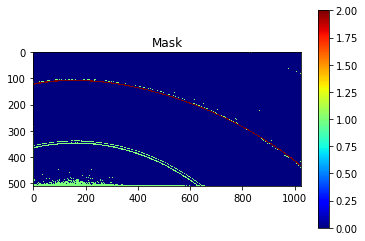

In [287]:
%matplotlib inline
def elipse(x, y, cX, cY, rX, rY, alpha):
    return ((x-cX)*np.cos(alpha) + (y-cY)*np.sin(alpha))**2/rX**2+((x-cX)*np.sin(alpha) - (y-cY)*np.cos(alpha))**2/rY**2

z = np.where(average >55, 1,0)

mask = np.zeros([512, 1024])


cX = 590
cY = 511
rX = 400
rY = 800
sc = 1.0
alpha = -0.4



threshold = 0.01

for i in range(0,512):
    for j in range(0,1024):
        if abs(elipse(i,j,cX,cY,sc*rX,sc*rY,alpha) - 1) < threshold:
            mask[i,j] = 1.0

plt.imshow(2*mask+z, vmin = 0, vmax = 2, cmap="jet")
cbar = plt.colorbar()
plt.title("Mask")
plt.show()

In [261]:
print(correlation.max())

334.0


In [314]:
list(range(154,160,1))


[154, 155, 156, 157, 158, 159]